In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



C:\Users\admin\AppData\Local\Temp\ipykernel_29956\3090805088.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Specify the path to the CSV file
Processed_Dataset_path = 'datasets/Processed_Dataset.csv'


# Read the compressed CSV file using pandas
Processed_Dataset = pd.read_csv(Processed_Dataset_path)

In [3]:
print("Size of data",len(Processed_Dataset))
Processed_Dataset.head()

Size of data 345600


,timestamp,exchange,symbol,DT_timestamp,BS5_timestamp,last_price,index_price,mark_price,asks[0].price,asks[0].amount,...,bids[2].price,bids[2].amount,asks[3].price,asks[3].amount,bids[3].price,bids[3].amount,asks[4].price,asks[4].amount,bids[4].price,bids[4].amount
0,1725148800000000,deribit,BTC-PERPETUAL,1725148800138000,1725148800151000,58971.0,58969.00,58970.45,58971.0,172780.0,...,58967.0,10000.0,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,1280.0
1,1725148800250000,deribit,BTC-PERPETUAL,1725148800138000,1725148800151000,58971.0,58969.00,58970.45,58971.0,172780.0,...,58967.0,10000.0,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,1280.0
2,1725148800500000,deribit,BTC-PERPETUAL,1725148800376000,1725148800622000,58971.0,58969.00,58970.44,58971.0,179840.0,...,58967.0,10000.0,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,1280.0
3,1725148800750000,deribit,BTC-PERPETUAL,1725148800806000,1725148800810000,58971.0,58967.96,58969.40,58971.0,179840.0,...,58967.0,10000.0,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,31280.0
4,1725148801000000,deribit,BTC-PERPETUAL,1725148800806000,1725148800948000,58971.0,58967.96,58969.40,58971.0,179840.0,...,58967.0,10000.0,58975.5,35900.0,58965.5,30000.0,58976.0,1290.0,58965.0,101000.0


In [5]:
# Making copy for dataset and rename column name
# P_book_snapshot_5=book_snapshot_5.copy(deep=True)
# P_book_snapshot_5.pop("local_timestamp")
# book_snapshot_5 = book_snapshot_5.rename(columns={'timestamp': 'BS5_timestamp'})

# P_derivative_ticker=derivative_ticker[["exchange","symbol", "timestamp","last_price", "index_price", "mark_price"]].copy(deep=True)
# P_derivative_ticker = P_derivative_ticker.rename(columns={'timestamp': 'DT_timestamp'})

In [6]:
# TODO: Time interval 

P_derivative_ticker['timestamp'] = pd.to_datetime(P_derivative_ticker['timestamp'], unit='us')
P_derivative_ticker.head()


NameError: name 'P_derivative_ticker' is not defined

In [ ]:
P_derivative_ticker.set_index('timestamp', inplace=True)

In [7]:
P_derivative_ticker = P_derivative_ticker[~P_derivative_ticker.index.duplicated(keep='first')]
P_derivative_ticker.head()

NameError: name 'P_derivative_ticker' is not defined

In [8]:
# P_derivative_ticker = P_derivative_ticker.reindex(df.index, method='ffill')

In [9]:
P_derivative_ticker.head()

NameError: name 'P_derivative_ticker' is not defined

In [10]:
print("Size of derivative_ticker",len(derivative_ticker))

NameError: name 'derivative_ticker' is not defined

In [11]:
merged_df = pd.merge_asof(df, derivative_ticker, on='timestamp', direction='forward')

NameError: name 'df' is not defined

In [12]:
# Function to find nearest timestamp in df2 for a given timestamp
def find_nearest_timestamp(ts, df2):
    idx = (df2.index - ts).argmin()
    return df2.iloc[idx]

# Fill df1 based on nearest timestamp from df2
for idx in df.index:
    df.loc[idx] = find_nearest_timestamp(idx, P_derivative_ticker)

NameError: name 'df' is not defined

In [13]:
# To readable timeframe
test=P_derivative_ticker
test['timestamp']= pd.to_datetime(test['timestamp'], unit='us')

NameError: name 'P_derivative_ticker' is not defined

In [ ]:
threshold = -30
time_window = 500
test['Diff'] = test['last_price'].diff()
test['TimeDiff'] = (test['timestamp'] - test['timestamp'].shift()).dt.total_seconds()
filtered_df = test[(test['last_price'].diff() >= threshold) & (test['TimeDiff'] <= time_window)]


In [ ]:
window_size = 4  # Adjust the window size as needed
test['smoothed_last_price'] = test['last_price'].rolling(window=30).mean()

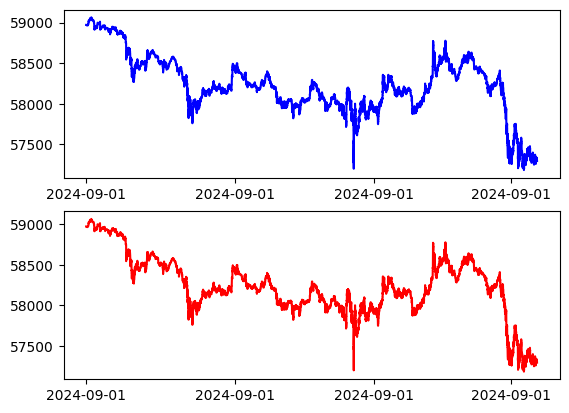

In [ ]:
fig, axs = plt.subplots(2)
n = 50000
axs[0].plot(test['timestamp'],test['last_price'],color='b')
axs[1].plot(filtered_df['timestamp'],filtered_df['last_price'],color='r')
# axs[2].plot(test['timestamp'],test['index_price'],color='g')
# Set x-axis tick positions for each subplot
for i in range(2):
    axs[i].set_xticks(test['timestamp'][::n])

plt.show()
